## Qualitative Analysis for Event Log without Randomness

Implemented decision points with guards:

- Request Manager or Standard Approval:
    - Request Manager Approval if total_price >= 800
    - Request Standard Approval otherwise
- Manager Rejection or Approval:
    - Manager Rejection if "unprofessional" items are being bought, i.e., "RECARO Exo Gaming Stuhl" or "Ducky One 3 Matcha TKL"
    - Manager Approval otherwise
- Standard Rejection or Approval:
    - Standard Rejection if item_category is "Fun" or if the Supplier is "Scamming Corp."
    - Standard Approval otherwise

In [1]:
import os
from exdpn.util import import_log
from exdpn.data_petri_net import data_petri_net
from exdpn.guards import ML_Technique

c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### First, look which machine learning guard has the highest performance for a decision point.

In [2]:
event_log_no_randomness = import_log(os.path.join(os.getcwd(), '..', 'datasets', 'p2p_base_no_randomness.xes'))
dpn_no_randomness = data_petri_net.Data_Petri_Net(event_log = event_log_no_randomness, 
                                                  event_level_attributes = ['item_category','item_id','item_amount','supplier','total_price'],
                                                  verbose = False)

decision_points = list(dpn_no_randomness.decision_points)
decision_points

[({'create purchase order'}, {'request standard approval', 'request manager approval'}),
 ({'request standard approval'}, {'approve purchase', 'reject purchase'}),
 ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})]

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})
Best guard: <exdpn.guards.decision_tree_guard.Decision_Tree_Guard object at 0x000001D6002D4DC0>


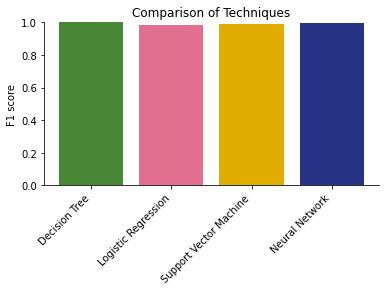

In [3]:
print("Decision point: ", decision_points[0])
dpn_no_randomness.guard_manager_per_place[decision_points[0]].get_comparison_plot()
best_guard = dpn_no_randomness.get_guard_at_place(decision_points[0])
print("Best guard:", best_guard)

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})
Best guard: <exdpn.guards.decision_tree_guard.Decision_Tree_Guard object at 0x000001D6002D44C0>


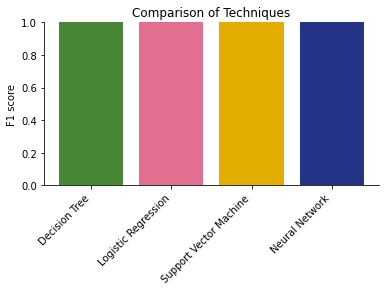

In [4]:
print("Decision point: ", decision_points[1])
dpn_no_randomness.guard_manager_per_place[decision_points[1]].get_comparison_plot()
best_guard = dpn_no_randomness.get_guard_at_place(decision_points[1])
print("Best guard:", best_guard)

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})
Best guard: <exdpn.guards.logistic_regression_guard.Logistic_Regression_Guard object at 0x000001D6002D6020>


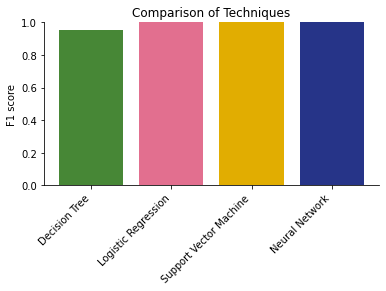

In [5]:
print("Decision point: ", decision_points[2])
dpn_no_randomness.guard_manager_per_place[decision_points[2]].get_comparison_plot()
best_guard = dpn_no_randomness.get_guard_at_place(decision_points[2])
print("Best guard:", best_guard)

### Decision Tree

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})


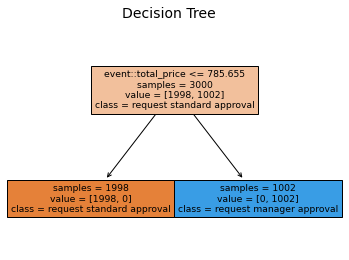

In [6]:
print("Decision point: ", decision_points[0])
dt_guard = dpn_no_randomness.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


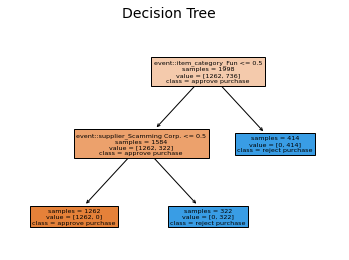

In [7]:
print("Decision point: ", decision_points[1])
dt_guard = dpn_no_randomness.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})


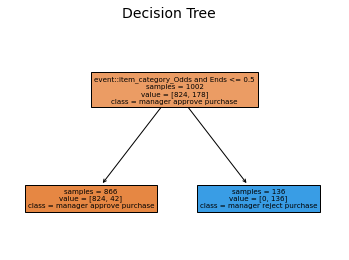

In [8]:
print("Decision point: ", decision_points[2])
dt_guard = dpn_no_randomness.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

### Neural Network

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})


100%|██████████| 100/100 [00:55<00:00,  1.80it/s]


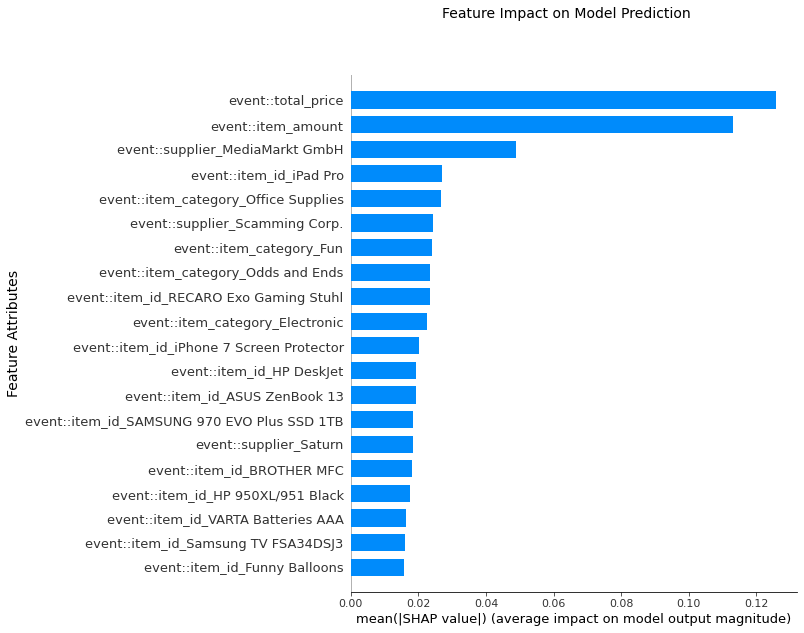

In [9]:
print("Decision point: ", decision_points[0])
nn_guard = dpn_no_randomness.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    # use sample of test data to speed up computation of explainable representation
    sampled_test_data = dpn_no_randomness.guard_manager_per_place[decision_points[0]].X_test.sample(n = min(100, len(dpn_no_randomness.guard_manager_per_place[decision_points[0]].X_test)))
    nn_guard.get_explainable_representation(sampled_test_data)

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


100%|██████████| 100/100 [00:49<00:00,  2.01it/s]


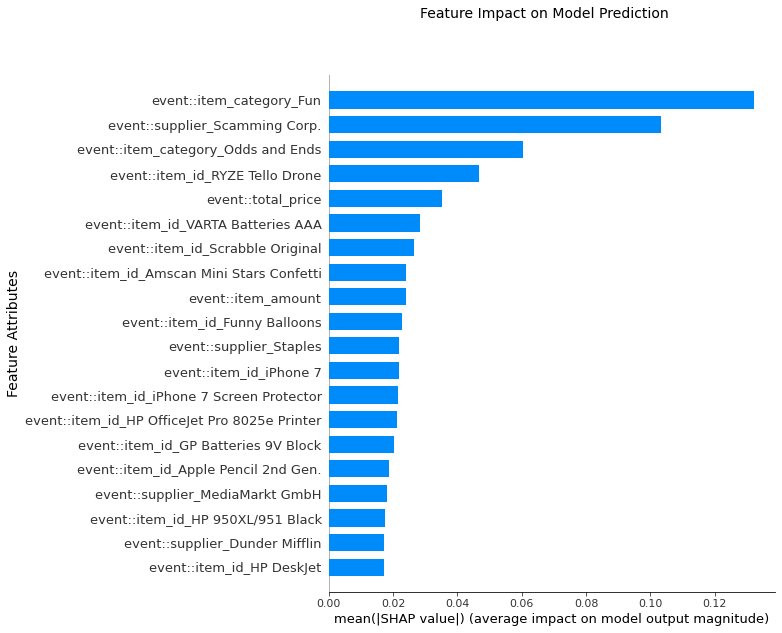

In [10]:
print("Decision point: ", decision_points[1])
nn_guard = dpn_no_randomness.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    # use sample of test data to speed up computation of explainable representation
    sampled_test_data = dpn_no_randomness.guard_manager_per_place[decision_points[1]].X_test.sample(n = min(100, len(dpn_no_randomness.guard_manager_per_place[decision_points[1]].X_test)))
    nn_guard.get_explainable_representation(sampled_test_data)

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})


100%|██████████| 100/100 [00:49<00:00,  2.04it/s]


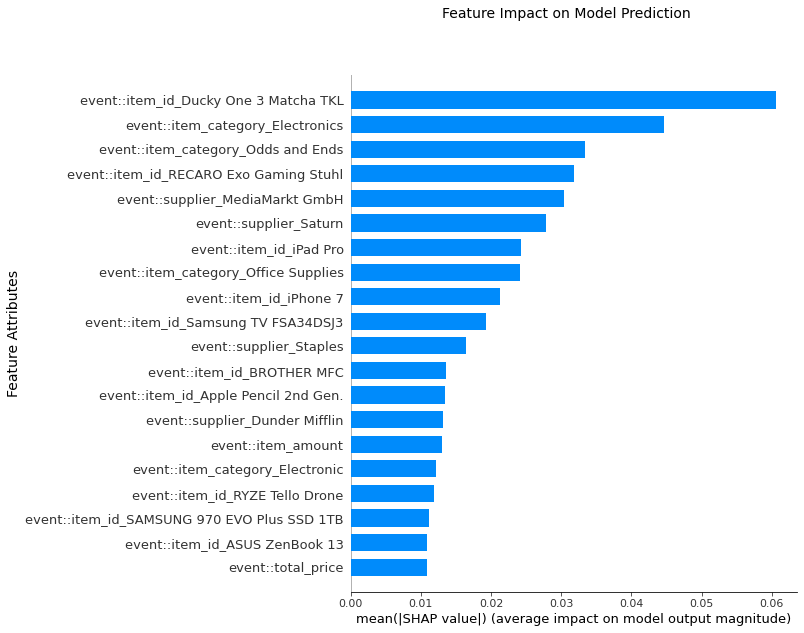

In [11]:
print("Decision point: ", decision_points[2])
nn_guard = dpn_no_randomness.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    # use sample of test data to speed up computation of explainable representation
    sampled_test_data = dpn_no_randomness.guard_manager_per_place[decision_points[2]].X_test.sample(n = min(100, len(dpn_no_randomness.guard_manager_per_place[decision_points[2]].X_test)))
    nn_guard.get_explainable_representation(sampled_test_data)

### Support Vector Machine

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})


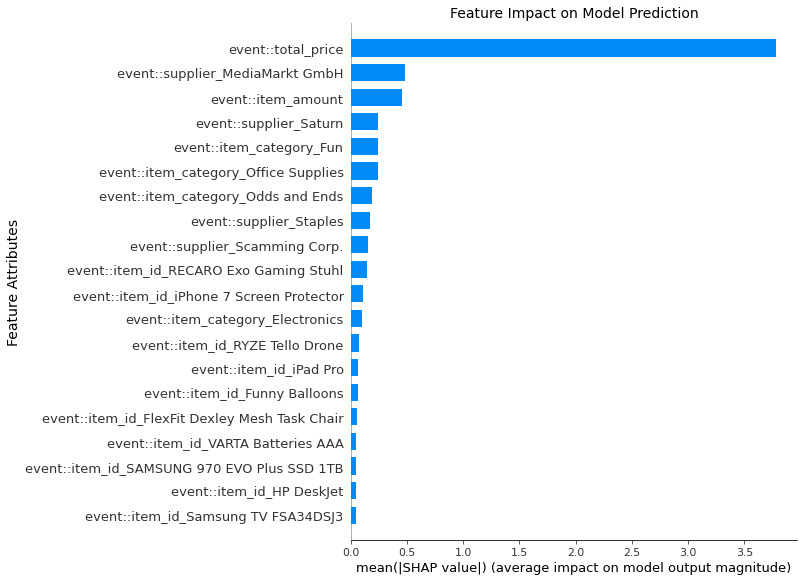

In [12]:
print("Decision point: ", decision_points[0])
svm_guard = dpn_no_randomness.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation(dpn_no_randomness.guard_manager_per_place[decision_points[0]].X_test)

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


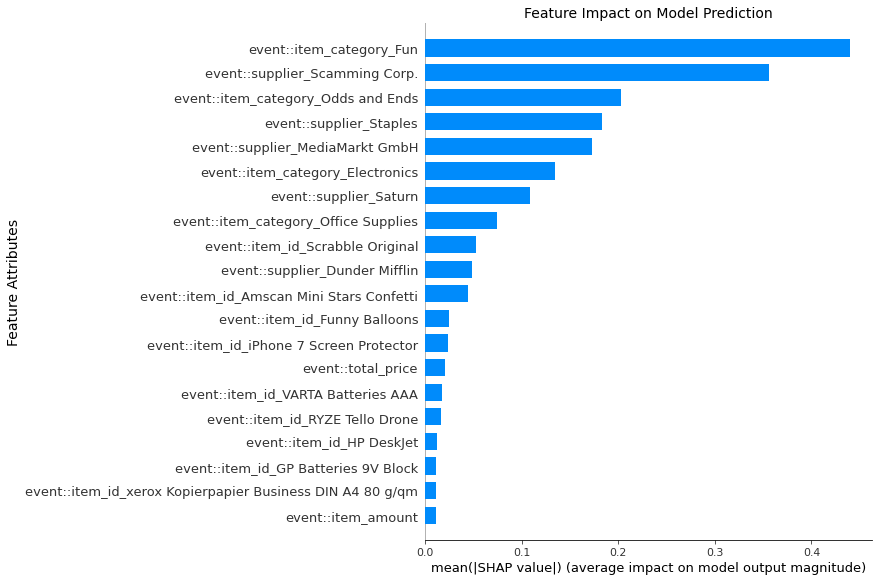

In [13]:
print("Decision point: ", decision_points[1])
svm_guard = dpn_no_randomness.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation(dpn_no_randomness.guard_manager_per_place[decision_points[1]].X_test)

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})


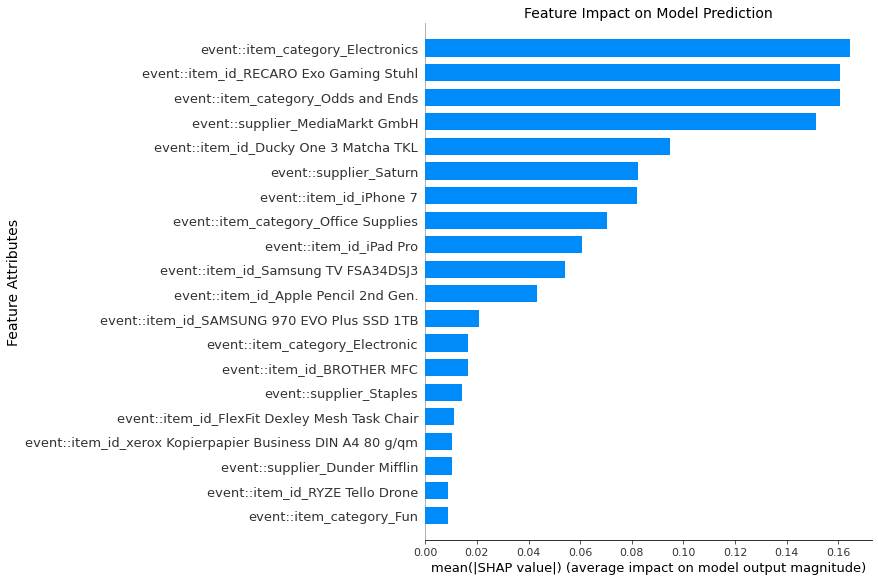

In [14]:
print("Decision point: ", decision_points[2])
svm_guard = dpn_no_randomness.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation(dpn_no_randomness.guard_manager_per_place[decision_points[2]].X_test)

### Logistic Regression

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})


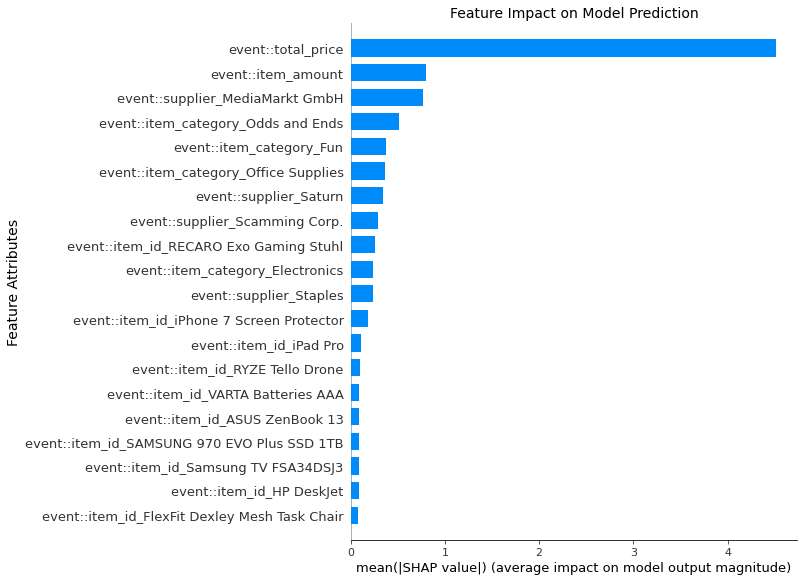

In [15]:
print("Decision point: ", decision_points[0])
lr_guard = dpn_no_randomness.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation(dpn_no_randomness.guard_manager_per_place[decision_points[0]].X_test)

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


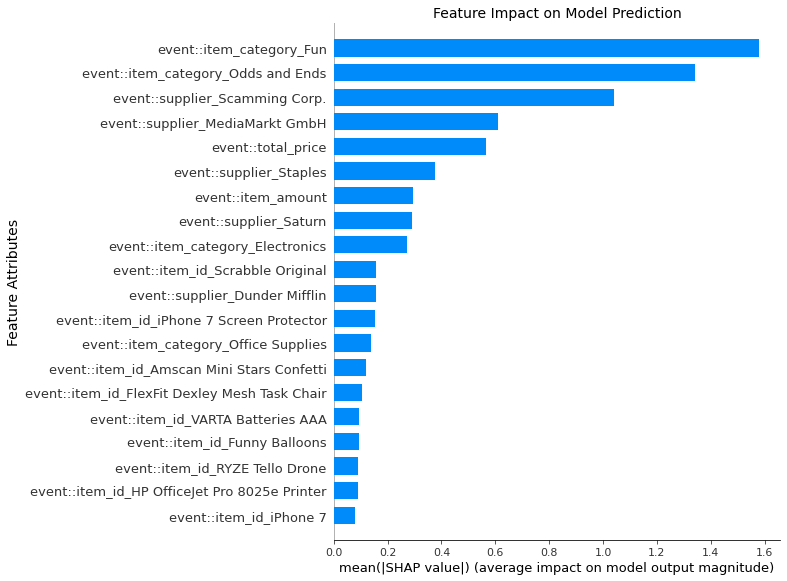

In [16]:
print("Decision point: ", decision_points[1])
lr_guard = dpn_no_randomness.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation(dpn_no_randomness.guard_manager_per_place[decision_points[1]].X_test)

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})


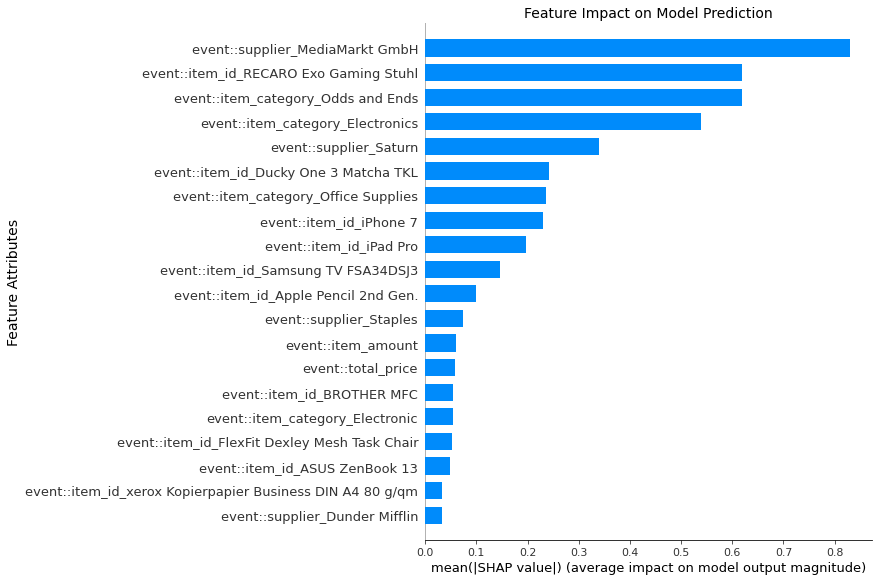

In [17]:
print("Decision point: ", decision_points[2])
lr_guard = dpn_no_randomness.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation(dpn_no_randomness.guard_manager_per_place[decision_points[2]].X_test)

### Summary Event Log without Randomness: 

- Request Manager or Standard Approval:  
All machine learning techniques are able to model the true underlying guard, the behavior is based on the amount of total_price. The Decision Tree splits the data at total_price <= 785 (true cut off is 800) to classify the data samples. For the other three machine learning techniques total_price has by far the largest impact on the model prediction. 

- Manager Rejection or Approval:  
While the Decision Tree guard does not capture the true underlying guard, for the three remaining machine learning techniques the features used in the true guard (that is item_id either "RECARO Exo Gaming Stuhl" or "Ducky One 3 Matcha TKL") have a huge impact on the model prediction, although not necessarily the highest impact. 

- Standard Rejection or Approval:  
All four techniques use feature attributes which are related to the behavior of the true underlying guard, that is supplier is "Scamming Corp." or item_category "Fun". Therefore, they seem to model behavior of the true underlying guard.

Overall, all machine learning techniques model the true underlying guards quite accurate and there are only small differences between the different techniques. Furthermore, all four machine learning guards achieve high performance scores measures using F1-score as seen in the comparison plots.
